Sparks Foundation Internship on Explanatory Data Analysis-Retail

Task- Perform Exploratory Data Analysis on dataset ‘SampleSuperstore’

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Loading the Dataset.....

In [3]:
df=pd.read_csv('SampleSuperstore.csv')

Display the top 5 rows of the dataset

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Grouping the sales and profit by region

In [5]:
df2=df.groupby('Region')[['Sales','Profit']].sum()
df2

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


Adding Profit percent column to the new set of data

In [6]:
df2['profit%'] = (df2['Profit']/df2['Sales'])*100
df2.head()

,Sales,Profit,profit%
Region,,,
Central,501239.8908,39706.3625,7.921629
East,678781.2400,91522.7800,13.483399
South,391721.9050,46749.4303,11.934342
West,725457.8245,108418.4489,14.944831


Plot against Region and Profit percent to find minimum Profit%

<AxesSubplot:xlabel='Region', ylabel='profit%'>

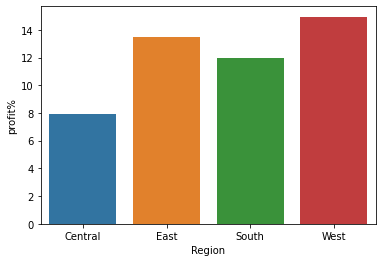

In [7]:
sb.barplot(data=df2,x=df2.index,y='profit%')

From the graph we came to know that the central part of the Region has least Profit%, so now working on Central Region data

In [8]:
df3=df[df['Region']=='Central']
df3.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
5756,Standard Class,Consumer,United States,Fort Worth,Texas,76106,Central,Technology,Copiers,1999.960,5,0.2,624.9875
9447,Standard Class,Consumer,United States,Tulsa,Oklahoma,74133,Central,Furniture,Furnishings,477.300,5,0.0,138.4170
4542,First Class,Consumer,United States,Oklahoma City,Oklahoma,73120,Central,Office Supplies,Envelopes,325.860,2,0.0,149.8956
3333,Standard Class,Home Office,United States,Chicago,Illinois,60653,Central,Furniture,Furnishings,2.032,1,0.6,-1.3208
5568,Same Day,Home Office,United States,Chicago,Illinois,60610,Central,Technology,Copiers,959.984,2,0.2,335.9944
6873,Second Class,Consumer,United States,Beaumont,Texas,77705,Central,Office Supplies,Binders,10.780,5,0.8,-17.2480
6871,Second Class,Corporate,United States,Chicago,Illinois,60610,Central,Office Supplies,Labels,11.952,3,0.2,3.8844
3524,Standard Class,Consumer,United States,Dallas,Texas,75081,Central,Technology,Phones,657.552,6,0.2,49.3164
2373,Second Class,Corporate,United States,Aurora,Illinois,60505,Central,Office Supplies,Paper,23.688,9,0.2,7.6986
9321,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Furniture,Furnishings,11.376,3,0.6,-5.6880


In [9]:
df4=df3.groupby('State')[['Sales','Profit']].sum()
df4

,Sales,Profit
State,,
Illinois,80166.1010,-12607.8870
Indiana,53555.3600,18382.9363
Iowa,4579.7600,1183.8119
Kansas,2914.3100,836.4435
Michigan,76269.6140,24463.1876
Minnesota,29863.1500,10823.1874
Missouri,22205.1500,6436.2105
Nebraska,7464.9300,2037.0942
North Dakota,919.9100,230.1497


In [10]:
df4['Profit%']=(df4['Profit']/df4['Sales'])*100
df4

,Sales,Profit,Profit%
State,,,
Illinois,80166.1010,-12607.8870,-15.727205
Indiana,53555.3600,18382.9363,34.325110
Iowa,4579.7600,1183.8119,25.848776
Kansas,2914.3100,836.4435,28.701253
Michigan,76269.6140,24463.1876,32.074618
Minnesota,29863.1500,10823.1874,36.242618
Missouri,22205.1500,6436.2105,28.985215
Nebraska,7464.9300,2037.0942,27.288859
North Dakota,919.9100,230.1497,25.018719


Plotting the data States-wise to know which state has least Profit 

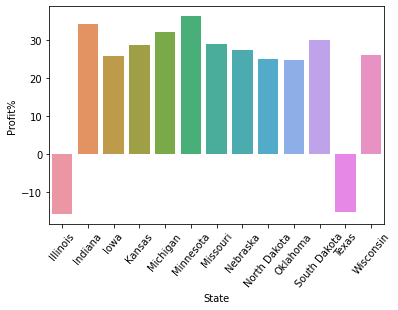

In [11]:
fig=sb.barplot(data=df4,x=df4.index,y='Profit%')
plt.xticks(rotation=50)
plt.show()

In [12]:
df4.sort_values(by='Profit%').head()

,Sales,Profit,Profit%
State,,,
Illinois,80166.1010,-12607.8870,-15.727205
Texas,170188.0458,-25729.3563,-15.118192
Oklahoma,19683.3900,4853.9560,24.660163
North Dakota,919.9100,230.1497,25.018719
Iowa,4579.7600,1183.8119,25.848776


In [13]:
cat_df=df.groupby(['State','Category'])[['Sales','Profit']].sum()
cat_df.sort_values(by='Profit',inplace=True)
var=cat_df.loc[[('Illinois'),('Texas'),('Oklahoma'),('North Dakota'),('Iowa')]]
var
var['Profit%']=(var['Profit']/var['Sales'])*100
var

Sales      Profit    Profit%
State        Category                                          
Illinois     Furniture        28274.5220  -9076.2894 -32.100594
             Office Supplies  19907.9060  -8354.1568 -41.964016
             Technology       31983.6730   4822.5592  15.078191
Texas        Office Supplies  44490.5300 -18584.6434 -41.772133
             Furniture        60593.2918 -10436.1419 -17.223263
             Technology       65104.2240   3291.4290   5.055630
Oklahoma     Office Supplies   5030.8400   1119.1935  22.246653
             Technology        6368.4500   1580.9003  24.823941
             Furniture         8284.1000   2153.8622  25.999954
North Dakota Office Supplies    919.9100    230.1497  25.018719
Iowa         Technology        1154.3000    318.3682  27.581062
             Office Supplies    783.1500    345.4052  44.104603
             Furniture         2642.3100    520.0385  19.681207

In [14]:
var.reset_index(inplace=True)

Plotting the data of top 5 states which has least profit%, category wise

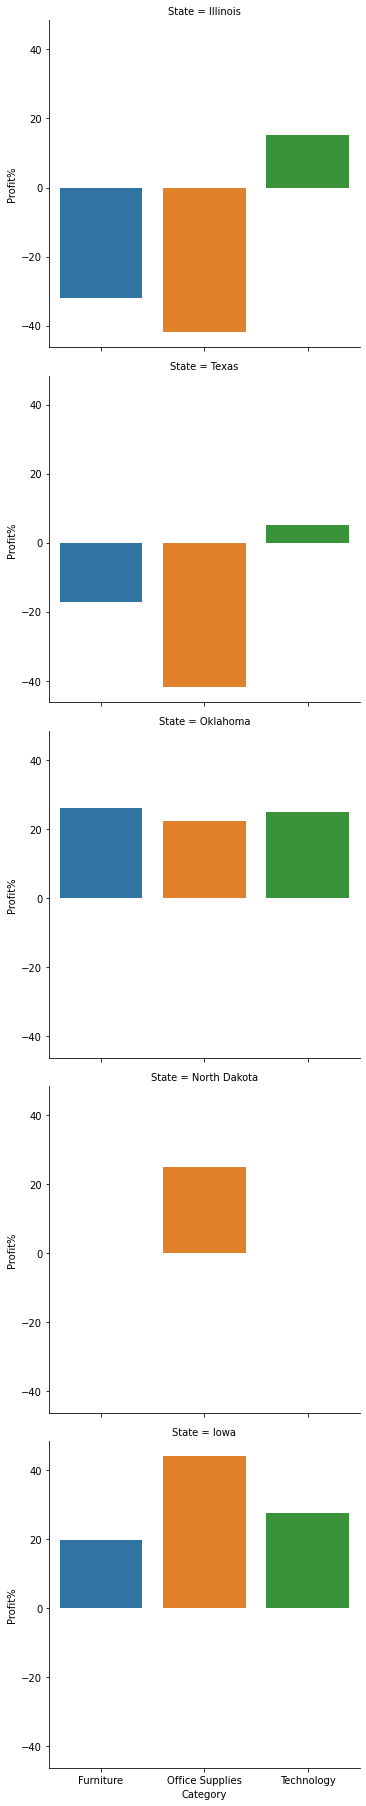

In [15]:
sb.catplot(x='Category',y="Profit%",row='State',data=var,kind='bar')

In [16]:
sub_cat_df=df.groupby(['State','Sub-Category'])[['Sales','Profit']].sum()
sub_cat_df.sort_values(by='Profit',inplace=True)
sub_var=sub_cat_df.loc[[('Illinois'),('Texas'),('Oklahoma'),('North Dakota'),('Iowa')]]
sub_var['Profit%']=(sub_var['Profit']/sub_var['Sales'])*100
sub_var

Sales     Profit     Profit%
State    Sub-Category                                  
Illinois Binders        4538.546 -7204.3242 -158.736393
         Tables         6550.670 -4309.7447  -65.790899
         Furnishings    2877.976 -2631.9766  -91.452347
         Appliances      974.720 -2482.4187 -254.680185
         Chairs        14563.178 -1578.6955  -10.840323
...                          ...        ...         ...
Iowa     Tables         1184.720   106.6248    9.000000
         Binders         247.960   118.7179   47.877843
         Paper           315.810   149.7355   47.413160
         Phones         1154.300   318.3682   27.581062
         Chairs         1408.100   394.2680   28.000000

[62 rows x 3 columns]

In [17]:
sub_var.reset_index(inplace=True)

Plotting the data of top 5 states which has least profit%, sub-category wise

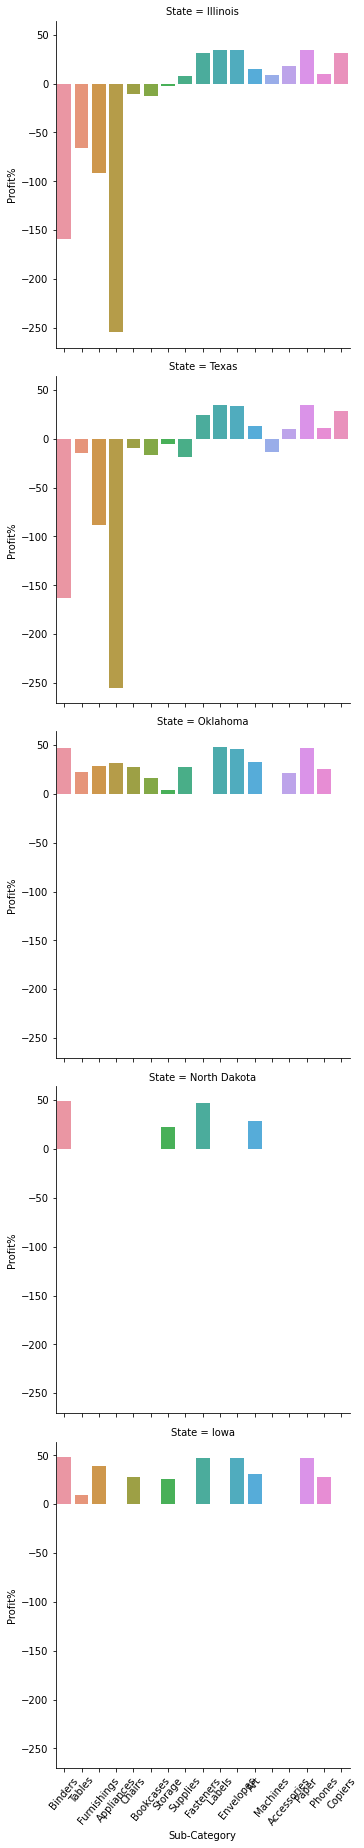

In [18]:
jk=sb.catplot(x='Sub-Category',y="Profit%",row='State',data=sub_var,kind='bar')
plt.xticks(rotation=50)
plt.show()

Focusing more on the two states with negative profit

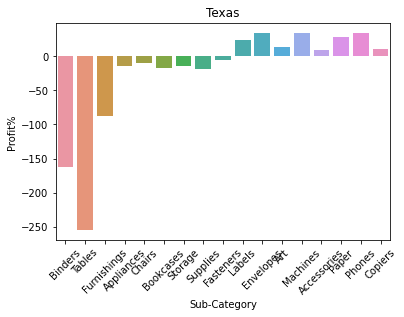

In [42]:
plot1 = sb.barplot(x='Sub-Category',y="Profit%",data=sub_var[sub_var["State"]=='Texas'])
plot1.set_xticklabels(labels=sub_var['Sub-Category'].unique(),rotation=45)
plot1.set_title("Texas")
plt.show()

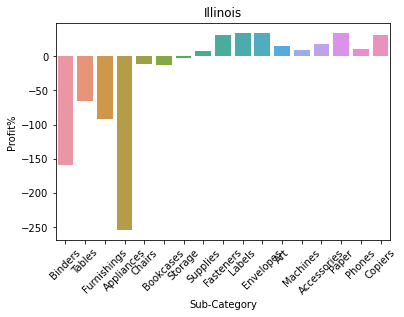

In [39]:
plot1 = sb.barplot(x='Sub-Category',y="Profit%",data=sub_var[sub_var["State"]=='Illinois'])
plot1.set_xticklabels(labels=sub_var['Sub-Category'].unique(),rotation=45)
plot1.set_title("Illinois")
plt.show()

Plotting the raltional grph to determine where to give discount and where not to

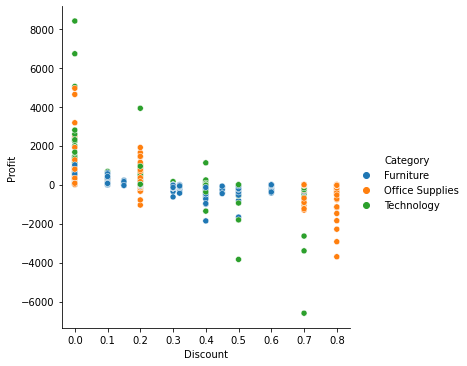

In [44]:
sb.relplot(data=df,x='Discount',y='Profit',hue='Category')

A category count histogram to see which ctegory of item has most sale and least sale

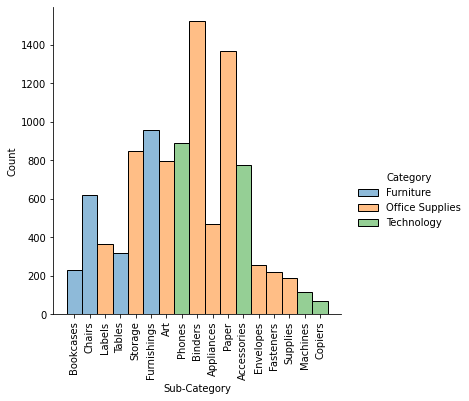

In [35]:
fig2=sb.displot(data=df,x='Sub-Category',hue='Category')
plt.xticks(rotation=90)
plt.show()

From the above analysis the weak areas where more work and focus is needed to make more profit is found.

                                                                               Thank You